# Intrepret First order ODE as a Filter 

In [1]:
from sympy import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9

import numpy as np
import sympy as sym
from sympy.abc import w, a, t, x, s, X, g, G, v

print(sym.__version__)
init_printing(use_unicode=True)

1.8


In [2]:
# define some variables we can use
v, g, X = symbols('v g X', cls = Function)
t = Symbol('t', positive=True)
a = Symbol('a', positive=True)
w = Symbol('w', positive=True)

## Define the ODE

Conisder a first order differerntial equation system driven by a sine input. System dynamics are determined by $w>0$ while the input frequency is determined by $a>0$
$$
\frac{dv(t)}{dt} + w v(t) = \sin(at)
$$
Question to address: how does the size of $a > 0$ compared to $w > 0$ impact the result? 

In [3]:
eom  = Eq(v(t).diff(t) + w*v(t), w*sym.sin(a*t))

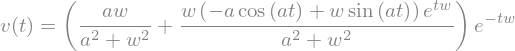

In [4]:
# solve the ODE
Vout = dsolve(eom,v(t), ics={v(0): 0})
Vout

Consider the two cases of $\frac{a}{w} \ll 1$ and $\frac{a}{w} \gg 1$ 

In [5]:
alow = 0.1
ahigh = 10
V_low_a = Vout.subs(w,1).subs(a,alow)
V_high_a = Vout.subs(w,1).subs(a,ahigh)


## Case 1: the input frequency is much lower than that of the systems, so $a/w \ll 1$

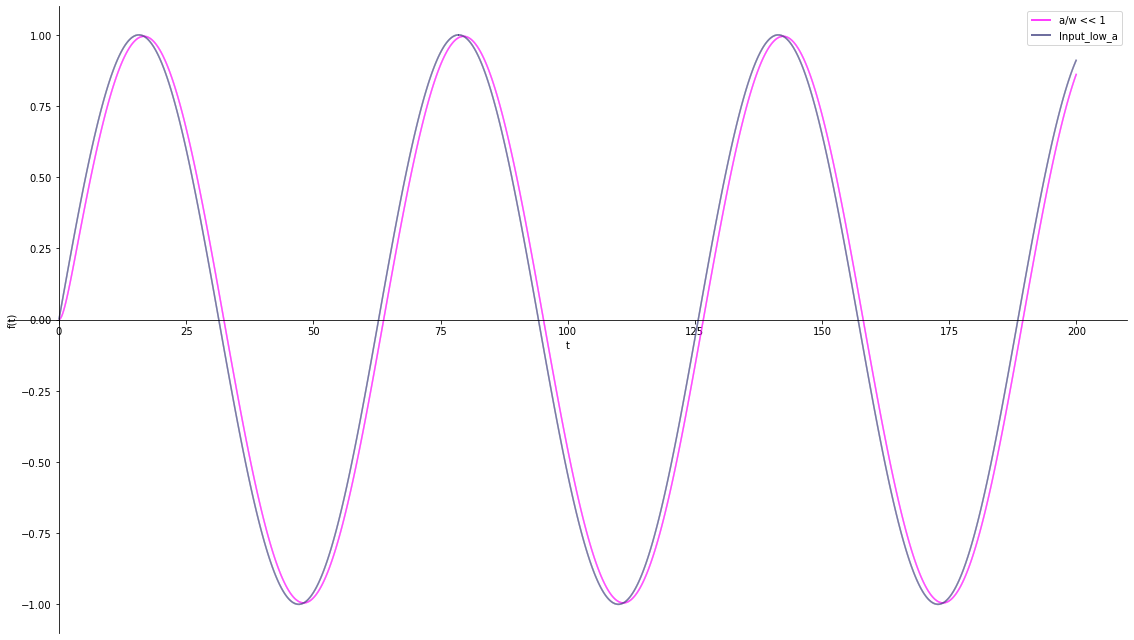

Clear that the response closely matches the input - i.e. the input passes through the system
This ODE acts as a low-pass filter - it allows low frequency inputs through the system


In [6]:
p1 = plot(V_low_a.rhs, (t, 0, 200), show=False, legend=True, adaptive = False, nb_of_points = 20000)
input_low_a = sym.sin(alow*t)
p3 = plot(input_low_a, (t, 0, 200), show=False, legend=True, adaptive = False, nb_of_points = 20000)
p1.extend(p3)
p1[0].line_color = (1, 0, 1)
p1[0].label = 'a/w << 1'
p1[1].line_color = (0.25, 0.25, 0.5)
p1[1].label = 'Input_low_a'
p1.show()

print('Clear that the response closely matches the input - i.e. the input passes through the system')
print("This ODE acts as a low-pass filter - it allows low frequency inputs through the system")

## Case 2: the input frequency is much higher than that of the systems, so $a/w \gg 1$

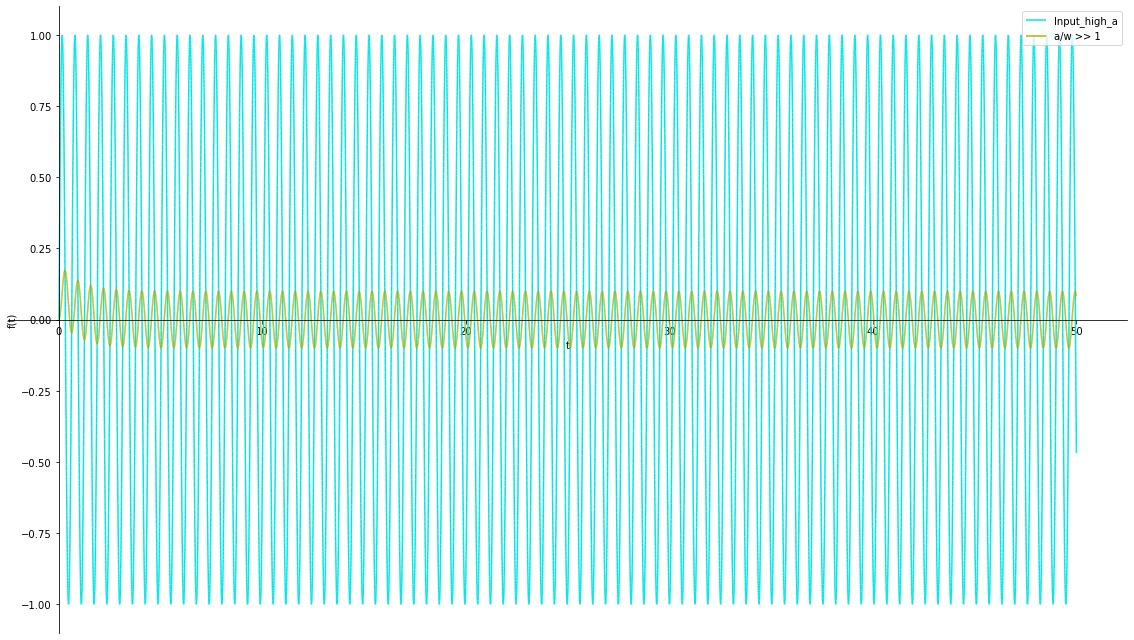

Clear that the response does *not* matches the input - i.e. the input is filtered out by the system


In [12]:
p2 = plot(V_high_a.rhs, (t, 0, 50), show=False, legend=True, adaptive = False, nb_of_points = 20000)
input_high_a = sym.sin(ahigh*t)
p4 = plot(input_high_a, (t, 0, 50), show=False, legend=True, adaptive = False, nb_of_points = 20000)
p4.extend(p2)

p4[1].line_color = (0.7, 0.7, 0)
p4[1].label = 'a/w >> 1'
p4[0].line_color = (0., 0.9, 0.9)
p4[0].label = 'Input_high_a'
p4.show()

print('Clear that the response does *not* matches the input - i.e. the input is filtered out by the system')